# Introduccion al Machine Learning

In [97]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import seaborn as sb
import statistics as stat
import matplotlib.pyplot as plt
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
from random import randint


/kaggle/input/echocardiogram-uci/echocardiogram.csv
/kaggle/input/network/Network.csv
/kaggle/input/new-york-air-quality/airquality.csv
/kaggle/input/new-york-city-air-quality/socrata_metadata.json
/kaggle/input/new-york-city-air-quality/air-quality.csv
/kaggle/input/new-york-city-air-quality/OutdoorAirandHealthInfoSource.csv
/kaggle/input/new-york-city-air-quality/DOHMH_AirQuality_DataDictionary.xlsx
/kaggle/input/servicesarea/ServiceArea.csv


Introduction to Python for Machine Learning

In [10]:
#Create an array of 10 random integers between 1 and 100, and then calculate the mean andstandard deviation of the array.

a = [23,34,56,78,89,97,76,54,34,67]
print(len(a),a)
print(type(a))
print(np.mean(a))
print(np.std(a))

10 [23, 34, 56, 78, 89, 97, 76, 54, 34, 67]
<class 'list'>
60.8
23.676148335402868


In [25]:
b = np.random.randint(1, high=101,size=10)
print(len(b),b)
print(type(b))
print(b.mean())
print(b.std())

10 [56 18 88 60  1 12  6 39 75 74]
<class 'numpy.ndarray'>
42.9
30.33628190797284


In [54]:
#Create a 2-dimensional array of 3 rows and 4 columns with random integer values. Then, calculatethe sum of each row and column.

a = np.random.randint(1,101,(3,4))
s = np.sum(a, axis=0)
s1 = np.sum(a, axis=1)

print(a)
print('sum of rows',s)
print('sum of raws',s1)


[[13 15 39 71]
 [91 70 11 13]
 [90 19 43 89]]
sum of rows [194 104  93 173]
sum of raws [138 185 241]


In [65]:
#Create a DataFrame with 3 columns: "Name", "Age", and "City". Add at least 5 rows of data to the
#DataFrame. Then, filter the DataFrame to only include rows where the person's age is greater than
#or equal to 30

df = pd.DataFrame()
df['Name'] = ['Juan','Pedro','Carla','Jaime','Gustavo']
df['Age'] = [10,40,25,29,33]
df['City'] = ['Quito','Quito','Quito','Quito','Quito']
dfm = df[df['Age'] >= 30]

print(dfm)

      Name  Age   City
1    Pedro   40  Quito
4  Gustavo   33  Quito


In [72]:
#Load a CSV file into a DataFrame and then calculate the mean, median, and mode of one of the
#columns in the DataFrame.


data = pd.read_csv("/kaggle/input/network/Network.csv")

#print(data)
print(np.mean(data['VersionNum']))
print(np.median(data['VersionNum']))
print(stat.mode(data['VersionNum']))
print(np.std(data['VersionNum']))

5.924908424908425
5.0
3
3.5933193112959896


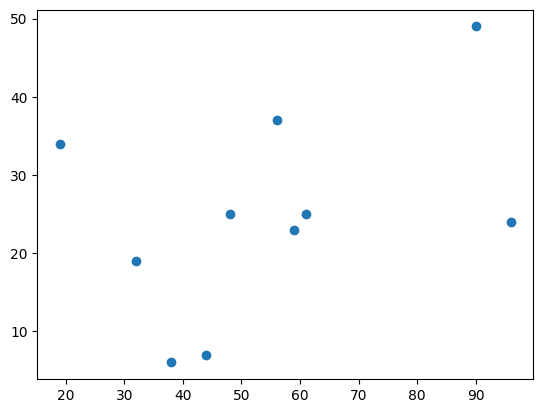

In [74]:
#Create a scatter plot of random x and y values between 1 and 100.

x = np.random.randint(1, high=101,size=10)
y = np.random.randint(1, high=101,size=10)

plt.scatter(x, y)
plt.show()

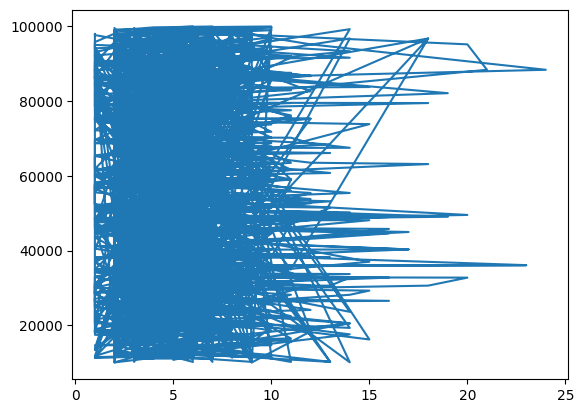

In [77]:
#Load a CSV file into a DataFrame and then create a line chart of one of the columns in the DataFrame.

data = pd.read_csv("/kaggle/input/network/Network.csv")

#print(data)

x=data['VersionNum']
y=data['IssuerId2']

plt.plot(x, y)
plt.show()


3. Data Import


The Echocardiogram data set in the UCI Machine Learning repository contains information on a set of
patients that suffered heart attacks at some point in the past.

In [9]:
#Download the Echocardiogram data set and import it to a data frame. Read the information on the
#data set and find out how missing values are represented and make sure that they are properly
#represented.

data = pd.read_csv("/kaggle/input/echocardiogram-uci/echocardiogram.csv")

data.isnull()

,survival,alive,age,pericardialeffusion,fractionalshortening,epss,lvdd,wallmotion-score,wallmotion-index,mult,name,group,aliveat1
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,False,False,False,False,False,False,False,False,False,False,False,True,True
129,False,False,False,False,False,False,False,False,False,False,False,True,True
130,False,False,False,False,False,False,False,False,False,False,False,True,True
131,False,False,False,False,False,False,False,False,False,False,False,True,True


In [7]:
#Assign the attributes with meaningful names. You can look for this information on the same webpage.

data = pd.read_csv("/kaggle/input/echocardiogram-uci/echocardiogram.csv")

data2 = data.rename(columns={'aliveat1':'aliveatAux'})

data2

,survival,alive,age,pericardialeffusion,fractionalshortening,epss,lvdd,wallmotion-score,wallmotion-index,mult,name,group,aliveatAux
0,11.0,0.0,71.0,0.0,0.260,9.000,4.600,14.0,1.000,1.000,name,1,0.0
1,19.0,0.0,72.0,0.0,0.380,6.000,4.100,14.0,1.700,0.588,name,1,0.0
2,16.0,0.0,55.0,0.0,0.260,4.000,3.420,14.0,1.000,1.000,name,1,0.0
3,57.0,0.0,60.0,0.0,0.253,12.062,4.603,16.0,1.450,0.788,name,1,0.0
4,19.0,1.0,57.0,0.0,0.160,22.000,5.750,18.0,2.250,0.571,name,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,7.5,1.0,64.0,0.0,0.240,12.900,4.720,12.0,1.000,0.857,name,NaN,NaN
129,41.0,0.0,64.0,0.0,0.280,5.400,5.470,11.0,1.100,0.714,name,NaN,NaN
130,36.0,0.0,69.0,0.0,0.200,7.000,5.050,14.5,1.210,0.857,name,NaN,NaN
131,22.0,0.0,57.0,0.0,0.140,16.100,4.360,15.0,1.360,0.786,name,NaN,NaN


In [6]:
# According to that same information, is there any redundant or irrelevant attribute that you can
# remove? Remove them.

data = pd.read_csv("/kaggle/input/echocardiogram-uci/echocardiogram.csv")

data.drop(['aliveat1'], axis=1)

,survival,alive,age,pericardialeffusion,fractionalshortening,epss,lvdd,wallmotion-score,wallmotion-index,mult,name,group
0,11.0,0.0,71.0,0.0,0.260,9.000,4.600,14.0,1.000,1.000,name,1
1,19.0,0.0,72.0,0.0,0.380,6.000,4.100,14.0,1.700,0.588,name,1
2,16.0,0.0,55.0,0.0,0.260,4.000,3.420,14.0,1.000,1.000,name,1
3,57.0,0.0,60.0,0.0,0.253,12.062,4.603,16.0,1.450,0.788,name,1
4,19.0,1.0,57.0,0.0,0.160,22.000,5.750,18.0,2.250,0.571,name,1
...,...,...,...,...,...,...,...,...,...,...,...,...
128,7.5,1.0,64.0,0.0,0.240,12.900,4.720,12.0,1.000,0.857,name,NaN
129,41.0,0.0,64.0,0.0,0.280,5.400,5.470,11.0,1.100,0.714,name,NaN
130,36.0,0.0,69.0,0.0,0.200,7.000,5.050,14.5,1.210,0.857,name,NaN
131,22.0,0.0,57.0,0.0,0.140,16.100,4.360,15.0,1.360,0.786,name,NaN


In [31]:
#Is there any data type change that you find useful? Perform it.

data = pd.read_csv("/kaggle/input/echocardiogram-uci/echocardiogram.csv")

data['age'] = np.int64(data['age'])

data.dtypes

survival                float64
alive                   float64
age                       int64
pericardialeffusion     float64
fractionalshortening    float64
epss                    float64
lvdd                    float64
wallmotion-score        float64
wallmotion-index        float64
mult                    float64
name                     object
group                    object
aliveat1                float64
dtype: object

4. Data Manipulation


Load the airquality data set regarding a set of New York Air Quality Measurements.

In [32]:
#For which attributes are there missing values?

data = pd.read_csv("/kaggle/input/new-york-air-quality/airquality.csv")

data.isnull()

,Ozone,Solar.R,Wind,Temp,Month,Day
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,True,True,False,False,False,False
...,...,...,...,...,...,...
148,False,False,False,False,False,False
149,True,False,False,False,False,False
150,False,False,False,False,False,False
151,False,False,False,False,False,False


In [34]:
#Do all the attributes are in the most suitable data type? Make the changes you find necessary.

data = pd.read_csv("/kaggle/input/new-york-air-quality/airquality.csv")

data['Wind'] = np.int64(data['Wind'])

data.dtypes

Ozone      float64
Solar.R    float64
Wind         int64
Temp         int64
Month        int64
Day          int64
dtype: object

In [35]:
#What period of the year do these records refer to?

data = pd.read_csv("/kaggle/input/new-york-air-quality/airquality.csv")

stat.mode(data['Month'])

5

In [37]:
#Load the package dplyr and save the data set in a table data frame format.

data = pd.read_csv("/kaggle/input/new-york-air-quality/airquality.csv")

data

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5
...,...,...,...,...,...,...
148,30.0,193.0,6.9,70,9,26
149,NaN,145.0,13.2,77,9,27
150,14.0,191.0,14.3,75,9,28
151,18.0,131.0,8.0,76,9,29


In [63]:
#Select the days in May with a temperature above 70 Fahrenheit.

data = pd.read_csv("/kaggle/input/new-york-air-quality/airquality.csv")

filter = data[(data['Temp'] > 70) &(data['Month'] == 5)]

filter

,Ozone,Solar.R,Wind,Temp,Month,Day
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
10,7.0,NaN,6.9,74,5,11
21,11.0,320.0,16.6,73,5,22
28,45.0,252.0,14.9,81,5,29
29,115.0,223.0,5.7,79,5,30
30,37.0,279.0,7.4,76,5,31


In [64]:
#Create a new attribute TempC which represents the temperature values in Celsius

data = pd.read_csv("/kaggle/input/new-york-air-quality/airquality.csv")

data1=data.assign(Celsius= (data['Temp']-32)*(0.55))

data1

,Ozone,Solar.R,Wind,Temp,Month,Day,Celsius
0,41.0,190.0,7.4,67,5,1,19.25
1,36.0,118.0,8.0,72,5,2,22.00
2,12.0,149.0,12.6,74,5,3,23.10
3,18.0,313.0,11.5,62,5,4,16.50
4,NaN,NaN,14.3,56,5,5,13.20
...,...,...,...,...,...,...,...
148,30.0,193.0,6.9,70,9,26,20.90
149,NaN,145.0,13.2,77,9,27,24.75
150,14.0,191.0,14.3,75,9,28,23.65
151,18.0,131.0,8.0,76,9,29,24.20


In [69]:
#Inspect which were the 30 hottest days.

data = pd.read_csv("/kaggle/input/new-york-air-quality/airquality.csv")

hotdays = data.sort_values('Temp',ascending=False)

hotdays.head(30)

,Ozone,Solar.R,Wind,Temp,Month,Day
119,76.0,203.0,9.7,97,8,28
121,84.0,237.0,6.3,96,8,30
122,85.0,188.0,6.3,94,8,31
120,118.0,225.0,2.3,94,8,29
41,NaN,259.0,10.9,93,6,11
126,91.0,189.0,4.6,93,9,4
125,73.0,183.0,2.8,93,9,3
124,78.0,197.0,5.1,92,9,2
42,NaN,250.0,9.2,92,6,12
101,NaN,222.0,8.6,92,8,10


In [77]:
#Inspect which were the hottest days, but also with the highest ozone values.

data = pd.read_csv("/kaggle/input/new-york-air-quality/airquality.csv")

hotdays = data.sort_values(['Ozone','Temp'],ascending = [False, True])

hotdays.head(30)

,Ozone,Solar.R,Wind,Temp,Month,Day
116,168.0,238.0,3.4,81,8,25
61,135.0,269.0,4.1,84,7,1
98,122.0,255.0,4.0,89,8,7
120,118.0,225.0,2.3,94,8,29
29,115.0,223.0,5.7,79,5,30
100,110.0,207.0,8.0,90,8,9
85,108.0,223.0,8.0,85,7,25
68,97.0,267.0,6.3,92,7,8
69,97.0,272.0,5.7,92,7,9
123,96.0,167.0,6.9,91,9,1


In [115]:
#Inspect the number of days for which there was a register for each month.

data = pd.read_csv("/kaggle/input/new-york-air-quality/airquality.csv")

data1=data.groupby('Day').count()

data1

,Ozone,Solar.R,Wind,Temp,Month
Day,,,,,
1,4,5,5,5,5
2,4,5,5,5,5
3,4,5,5,5,5
4,3,4,5,5,5
5,3,3,5,5,5
6,4,3,5,5,5
7,5,5,5,5,5
8,4,5,5,5,5
9,5,5,5,5,5


In [109]:
#For each month, obtain the minimum and the maximum temperature registered in Celsius.

data = pd.read_csv("/kaggle/input/new-york-air-quality/airquality.csv")

data1=data.assign(Celsius= (data['Temp']-32)*(0.55))

data2 = data1.groupby('Month').agg(
    # Get max of the duration column for each group
    max_duration=('Celsius', max),
    # Get min of the duration column for each group
    min_duration=('Celsius', min))

data2

,max_duration,min_duration
Month,,
5,26.95,13.20
6,33.55,18.15
7,33.00,22.55
8,35.75,22.00
9,33.55,17.05


In [125]:
#Obtain the average of the following parameters by month: temperature in celsius, wind, solar
#radiation and ozone.

data = pd.read_csv("/kaggle/input/new-york-air-quality/airquality.csv")

data1=data.assign(Celsius= (data['Temp']-32)*(0.55))

aggregations = {
    'Ozone': 'mean','Solar.R': 'mean','Wind': 'mean', 'Celsius': 'mean'
}

data2 = data1.groupby('Month').agg(aggregations)

data2


,Ozone,Solar.R,Wind,Celsius
Month,,,,
5,23.615385,181.296296,11.622581,18.451613
6,29.444444,190.166667,10.266667,25.905000
7,59.115385,216.483871,8.941935,28.546774
8,59.961538,171.857143,8.793548,28.582258
9,31.448276,167.433333,10.180000,24.695000


In [126]:
#What values did you obtain regarding ozone and solar radiation attributes? Why? Make the
#necessary change so that you get the average of the registered values.

data = pd.read_csv("/kaggle/input/new-york-air-quality/airquality.csv")

data1=data.assign(Celsius= (data['Temp']-32)*(0.55))

aggregations = {
    'Ozone': 'mean','Solar.R': 'mean','Wind': 'mean', 'Celsius': 'mean'
}

data2 = data1.groupby('Month').agg(aggregations)

data2

,Ozone,Solar.R,Wind,Celsius
Month,,,,
5,23.615385,181.296296,11.622581,18.451613
6,29.444444,190.166667,10.266667,25.905000
7,59.115385,216.483871,8.941935,28.546774
8,59.961538,171.857143,8.793548,28.582258
9,31.448276,167.433333,10.180000,24.695000
